In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn.svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import sklearn.metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import cross_validation


from sklearn.metrics import f1_score
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_df = pd.read_csv('data_process1.csv')
dataset = data_df

In [3]:
#Creating k folds
def fold_i_of_k(dataset, i, k):
    n = len(dataset)
    return len(dataset[n*(i-1)//k:n*i//k])

Accuracy for fold  1 is:  0.728070175439
Accuracy for fold  2 is:  0.964912280702
Accuracy for fold  3 is:  0.721739130435
Accuracy for fold  4 is:  0.824561403509
Accuracy for fold  5 is:  0.878260869565
Accuracy for fold  6 is:  0.798245614035
Accuracy for fold  7 is:  0.5
Accuracy for fold  8 is:  0.660869565217
Accuracy for fold  9 is:  0.517543859649
Accuracy for fold  10 is:  0.565217391304

Cross validation accuracy of Logistic Regression is:  0.715942028986
F1 score of Logistic Regression is:  0.712815116536


Text(0.5,1,'2-class Precision-Recall curve: AP=0.65')

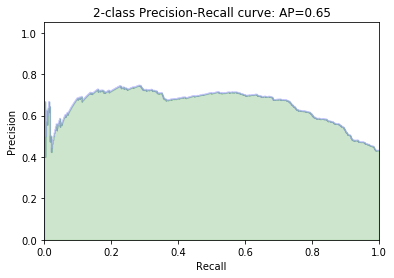

In [4]:
#Logistic Regression
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
  
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))

    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    lr_pred = lr.predict(X_test)
    result_pred = np.concatenate((result_pred,lr_pred))
    
    y_score = lr.decision_function(X_test)
    result_score = np.concatenate((result_score,y_score))
   
    ac = accuracy_score(y_test,lr_pred)
    print("Accuracy for fold ",counter,"is: ",ac);
    f = f1_score(y_test, lr_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K
print("\nCross validation accuracy of Logistic Regression is: ",total_ac)
print("F1 score of Logistic Regression is: ",total_f)

#**************Precision-Recall curve******************/


precision, recall, _ = precision_recall_curve(y, result_score)
average_precision = average_precision_score(y, result_score)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Fold  1
0.728070175439
Fold  2
0.859649122807
Fold  3
0.695652173913
Fold  4
0.80701754386
Fold  5
0.826086956522
Fold  6
0.684210526316
Fold  7
0.578947368421
Fold  8
0.573913043478
Fold  9
0.535087719298
Fold  10
0.634782608696
Cross validation decision tree accuracy is:  0.692341723875
F1 score is:  0.693695841053


Text(0.5,1,'2-class Precision-Recall curve: AP=0.65')

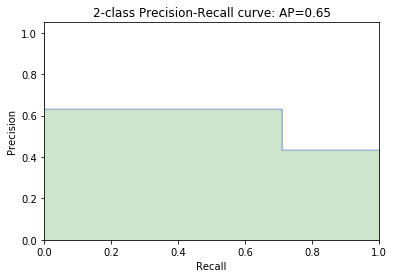

In [5]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))

    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    dt_pred = dt.predict(X_test)
    result_pred = np.concatenate((result_pred,dt_pred))

    y_scores = dt.predict_proba(X_test)[:, 1]
    result_score = np.concatenate((result_score,y_scores))
    ac = accuracy_score(y_test,dt_pred)
    print(ac)
    f = f1_score(y_test, dt_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation decision tree accuracy is: ",total_ac)
print("F1 score is: ",total_f)
precision, recall, _ = precision_recall_curve(y, result_score)

plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Fold  1
0.798245614035
Fold  2
0.947368421053
Fold  3
0.695652173913
Fold  4
0.780701754386
Fold  5
0.817391304348
Fold  6
0.798245614035
Fold  7
0.578947368421
Fold  8
0.547826086957
Fold  9
0.535087719298
Fold  10
0.652173913043
Cross validation random forest accuracy is:  0.715163996949
F1 score is:  0.715089818539


Text(0.5,1,'2-class Precision-Recall curve: AP=0.65')

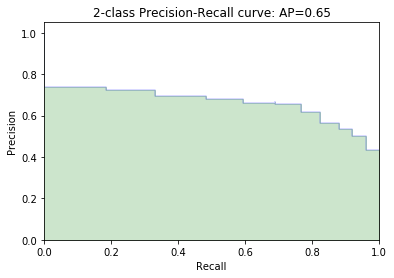

In [6]:
##Random Forest
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))

    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    result_pred = np.concatenate((result_pred,rfc_pred))

    y_scores = rfc.predict_proba(X_test)[:, 1]
    result_score = np.concatenate((result_score,y_scores))
    ac = accuracy_score(y_test,rfc_pred)
    print(ac)
    f = f1_score(y_test, rfc_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation random forest accuracy is: ",total_ac)
print("F1 score is: ",total_f)
precision, recall, _ = precision_recall_curve(y, result_score)

plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Fold  1
0.684210526316
Fold  2
0.938596491228
Fold  3
0.791304347826
Fold  4
0.824561403509
Fold  5
0.895652173913
Fold  6
0.570175438596
Fold  7
0.789473684211
Fold  8
0.608695652174
Fold  9
0.491228070175
Fold  10
0.634782608696
Cross validation accuracy for linear svm is:  0.722868039664
F1 score is:  0.723919596434


Text(0.5,1,'2-class Precision-Recall curve: AP=0.66')

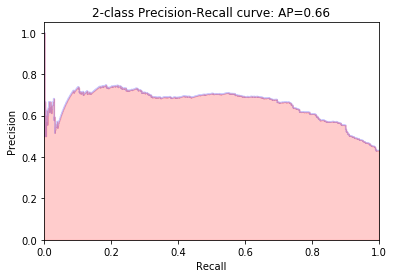

In [7]:
#SVM Linear
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))

    linearsvm = SVC(kernel='linear', C=60.00319,probability=True)
    linearsvm.fit(X_train,y_train)
    linearsvm_pred = dt.predict(X_test)
    result_pred = np.concatenate((result_pred,linearsvm_pred))

    y_score = linearsvm.decision_function(X_test)
    result_score = np.concatenate((result_score,y_score))

    ac = accuracy_score(y_test,linearsvm_pred)
    print(ac);
    f = f1_score(y_test, linearsvm_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation accuracy for linear svm is: ",total_ac)
print("F1 score is: ",total_f)

#Linear SVM
average_precision = average_precision_score(y, result_score)
precision, recall, _ = precision_recall_curve(y, result_score)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Fold  1
0.69298245614
Fold  2
0.956140350877
Fold  3
0.713043478261
Fold  4
0.798245614035
Fold  5
0.886956521739
Fold  6
0.798245614035
Fold  7
0.605263157895
Fold  8
0.678260869565
Fold  9
0.456140350877
Fold  10
0.6
Cross validation accuracy for rbf svm is:  0.718527841342
F1 score is:  0.719426361631


Text(0.5,1,'2-class Precision-Recall curve: AP=0.63')

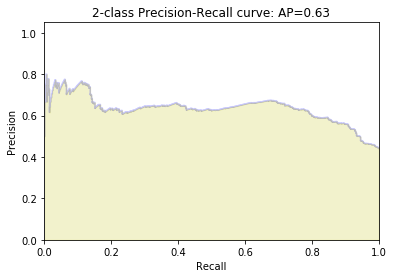

In [8]:
#Rbf SVM
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))
    rbfsvm = SVC(kernel='rbf', C= 31.2193,gamma=0.00827,probability=True)
    rbfsvm.fit(X_train,y_train)
    rbfsvm_pred = rbfsvm.predict(X_test)
    result_pred = np.concatenate((result_pred,rbfsvm_pred))
    y_score = rbfsvm.decision_function(X_test)
    result_score = np.concatenate((result_score,y_score))
    ac = accuracy_score(y_test,rbfsvm_pred)
    print(ac);
    f = f1_score(y_test, rbfsvm_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation accuracy for rbf svm is: ",total_ac)
print("F1 score is: ",total_f)

average_precision = average_precision_score(y, result_score)
precision, recall, _ = precision_recall_curve(y, result_score)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='y')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

Fold  1
0.666666666667
Fold  2
0.973684210526
Fold  3
0.713043478261
Fold  4
0.754385964912
Fold  5
0.834782608696
Fold  6
0.815789473684
Fold  7
0.517543859649
Fold  8
0.573913043478
Fold  9
0.438596491228
Fold  10
0.504347826087
Cross validation accuracy for poly svm is:  0.679275362319
F1 score is:  0.67888557731


Text(0.5,1,'2-class Precision-Recall curve: AP=0.62')

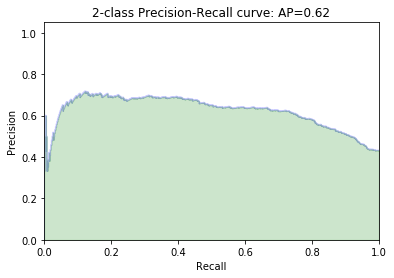

In [9]:
#Polynomial SVM
#Constants
FOLD_I = 1
FOLD_K =10

#Creating 10 folds
result_pred = np.array([])
result_score = np.array([])
y = np.array([])
counter = 1
s=0
total_ac = 0
total_f = 0
while counter!=FOLD_K+1:
    print("Fold ",counter)
    fold = fold_i_of_k(dataset,counter,10)
    d_fold = dataset[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:11]
    y_test = d_test.iloc[:,11:12]
    d_train = dataset.drop(dataset.index[s:s+fold])
    X_train = d_train.iloc[:,0:11]
    y_train = d_train.iloc[:,11:12]
 
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    
    y_train = y_train.as_matrix()
    y_train = y_train.ravel()
    
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    
    y_test = y_test.as_matrix()
    y_test = y_test.ravel()
    y = np.concatenate((y,y_test))
    polysvm = SVC(kernel='poly',C= 35.6737,gamma=0.04227,probability=True)
    polysvm.fit(X_train,y_train)
    polysvm_pred = polysvm.predict(X_test)
    result_pred = np.concatenate((result_pred,polysvm_pred))
  
    y_score = polysvm.decision_function(X_test)
    result_score = np.concatenate((result_score,y_score))
    ac = accuracy_score(y_test,polysvm_pred)
    print(ac)

    f = f1_score(y_test, polysvm_pred, average='weighted')
    total_f = total_f+f
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1
total_f = total_f /  FOLD_K  
total_ac = total_ac / FOLD_K

print("Cross validation accuracy for poly svm is: ",total_ac)
print("F1 score is: ",total_f)

average_precision = average_precision_score(y, result_score)
precision, recall, _ = precision_recall_curve(y, result_score)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

(0.0, 1.0)

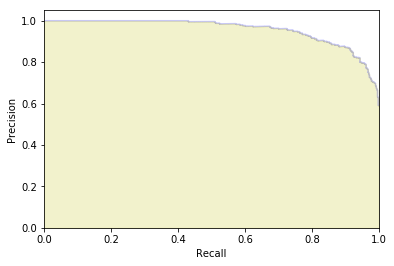

In [31]:
#Voting classifier

dataset = data_df.as_matrix()
X = dataset[:,0:11]
y = dataset[:,11:12]
standardized_X = preprocessing.scale(X)
clf1 = LogisticRegression(random_state=58)
clf2 = RandomForestClassifier(random_state=58)
clf4 = SVC(kernel='linear', C=60.00319,probability=True)
clf5 = SVC(kernel='rbf', C= 31.2193,gamma=0.00827,probability=True)

eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('linear', clf4),('rbf', clf5)],voting='soft')
eclf2 = eclf2.fit(standardized_X , y.ravel())
sco = eclf2.predict_proba(standardized_X )[:,1]


average_precision = average_precision_score(y.ravel(), sco)
precision, recall, _ = precision_recall_curve(y.ravel(), sco)
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='y')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [33]:
#Voting Classifier

dataset = data_df.as_matrix()
X = dataset[:,0:11]
y = dataset[:,11:12]
standardized_X = preprocessing.scale(X)
clf1 = LogisticRegression(random_state=58)
clf2 = RandomForestClassifier(random_state=58)
clf4 = SVC(kernel='linear', C=60.00319,probability=True)
clf5 = SVC(kernel='rbf', C= 31.2193,gamma=0.00827,probability=True)

eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('linear', clf4),('rbf', clf5)],voting='soft')
eclf2 = eclf2.fit(standardized_X , y.ravel())
vote_pred = eclf2.predict(standardized_X)
ac = accuracy_score(y.ravel(),vote_pred)
print("Accuracy of voting classifier is: ",ac)
f = f1_score(y.ravel(), vote_pred, average='weighted')
print("F1-Score of voting classifier is: ",f)
#sco = eclf2.predict_proba(standardized_X )[:,1]

Accuracy of voting classifier is:  0.894230769231
F1-Score of voting classifier is:  0.894079074238


In [27]:
#cv=10

dataset = data_df.as_matrix()
X = dataset[:,0:11]
y = dataset[:,11:12]
standardized_X = preprocessing.scale(X)
clf1 = LogisticRegression(random_state=58)
clf2 = RandomForestClassifier(random_state=58)
clf3 = SVC(kernel='poly',C= 35.6737,gamma=0.04227,probability=True)
clf4 = SVC(kernel='linear', C=60.00319,probability=True)
clf5 = SVC(kernel='rbf', C= 31.2193,gamma=0.00827,probability=True)

for clf, label in zip([clf1, clf2, clf3, clf4, clf5], ['Logistic Regression', 'Random Forest', 'Polynomial','Linear Svm','Rbf Svm']):
    scores = cross_validation.cross_val_score(clf, standardized_X, y.ravel(), cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (+/- 0.12) [Logistic Regression]
Accuracy: 0.74 (+/- 0.14) [Random Forest]
Accuracy: 0.69 (+/- 0.14) [Polynomial]
Accuracy: 0.72 (+/- 0.12) [Linear Svm]
Accuracy: 0.76 (+/- 0.13) [Rbf Svm]


In [28]:
#CV= 5
dataset = data_df.as_matrix()
X = dataset[:,0:11]
y = dataset[:,11:12]
standardized_X = preprocessing.scale(X)
clf1 = LogisticRegression(random_state=58)
clf2 = RandomForestClassifier(random_state=58)
clf3 = SVC(kernel='poly',C= 35.6737,gamma=0.04227,probability=True)
clf4 = SVC(kernel='linear', C=60.00319,probability=True)
clf5 = SVC(kernel='rbf', C= 31.2193,gamma=0.00827,probability=True)

for clf, label in zip([clf1, clf2, clf3, clf4, clf5], ['Logistic Regression', 'Random Forest', 'Polynomial','Linear Svm','Rbf Svm']):
    scores = cross_validation.cross_val_score(clf, standardized_X, y.ravel(), cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.68 (+/- 0.09) [Logistic Regression]
Accuracy: 0.71 (+/- 0.13) [Random Forest]
Accuracy: 0.67 (+/- 0.11) [Polynomial]
Accuracy: 0.71 (+/- 0.09) [Linear Svm]
Accuracy: 0.72 (+/- 0.12) [Rbf Svm]
